In [1]:
import sys
import os
current_dir = os.getcwd()
print(current_dir)


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all


In [3]:
library_path = os.path.join('..', '..', '..','..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)
print(sys.path)

['..\\..\\..\\..\\UCB-USACE-LSTMs', 'F:\\Dino\\UCB-USACE-LSTMs\\UCB_training\\models\\guerneville_all', 'C:\\Users\\Dino\\anaconda3\\python312.zip', 'C:\\Users\\Dino\\anaconda3\\DLLs', 'C:\\Users\\Dino\\anaconda3\\Lib', 'C:\\Users\\Dino\\anaconda3', '', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\win32', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\Pythonwin']


In [5]:
from pathlib import Path
from neuralhydrology.evaluation.metrics import *
from UCB_training.UCB_train import UCB_trainer
from UCB_training.UCB_utils import combinedPlot
from UCB_training.UCB_utils import fancyCombinedPlot

## Set up Working Directory

In [7]:
# Dynamically find the repo root from the current working directory
current_path = os.getcwd()
library_path = current_path.split('UCB-USACE-LSTMs')[0] + 'UCB-USACE-LSTMs'

# Construct the target path
target_path = os.path.join(library_path, 'UCB_training', 'models', 'guerneville_all')

# Verify if the directory exists before changing
if os.path.exists(target_path):
    os.chdir(target_path)
    print("Current Working Directory:", os.getcwd())
    print("Train Basin File Exists:", os.path.exists("guerneville")) #each basin has its own train basin file, so change for different basins e.g "guerneville", etc.
else:
    print(f"Error: The target path '{target_path}' does not exist.")

Current Working Directory: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all
Train Basin File Exists: True


In [8]:
path_to_csv = Path(library_path +'/russian_river_data')
path_to_yaml = Path("guerneville_gage.yaml") #update the yaml file for different basins

## Standard daily LSTM (no ensembles, no physics), train on training subset, evaluated on validation period

In [47]:
params = {
    "epochs":8,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
lstmNoPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=False)

In [49]:
lstmNoPhysicsDaily.train()

2025-02-06 19:30:44,656: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_193044\output.log initialized.
2025-02-06 19:30:44,657: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_193044
2025-02-06 19:30:44,658: ### Run configurations for testing_run
2025-02-06 19:30:44,660: experiment_name: testing_run
2025-02-06 19:30:44,664: train_basin_file: guerneville
2025-02-06 19:30:44,667: validation_basin_file: guerneville
2025-02-06 19:30:44,668: test_basin_file: guerneville
2025-02-06 19:30:44,670: train_start_date: 1994-10-01 00:00:00
2025-02-06 19:30:44,672: train_end_date: 2002-09-30 00:00:00
2025-02-06 19:30:44,675: validation_start_date: 2002-10-01 00:00:00
2025-02-06 19:30:44,677: validation_end_date: 2005-09-30 00:00:00
2025-02-06 19:30:44,678: test_start_date: 2005-10-01 00:00:00
2025-02-06 19:30:44,679: test_end_date: 2009-09-29 00:00:00
2025-02-06 19:30:44,680: device: cpu
2

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]
2025-02-06 19:30:56,036: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_193044\validation\model_epoch008\validation_metrics.csv
2025-02-06 19:30:56,039: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_193044\validation\model_epoch008\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_0602_193044')

got predictions


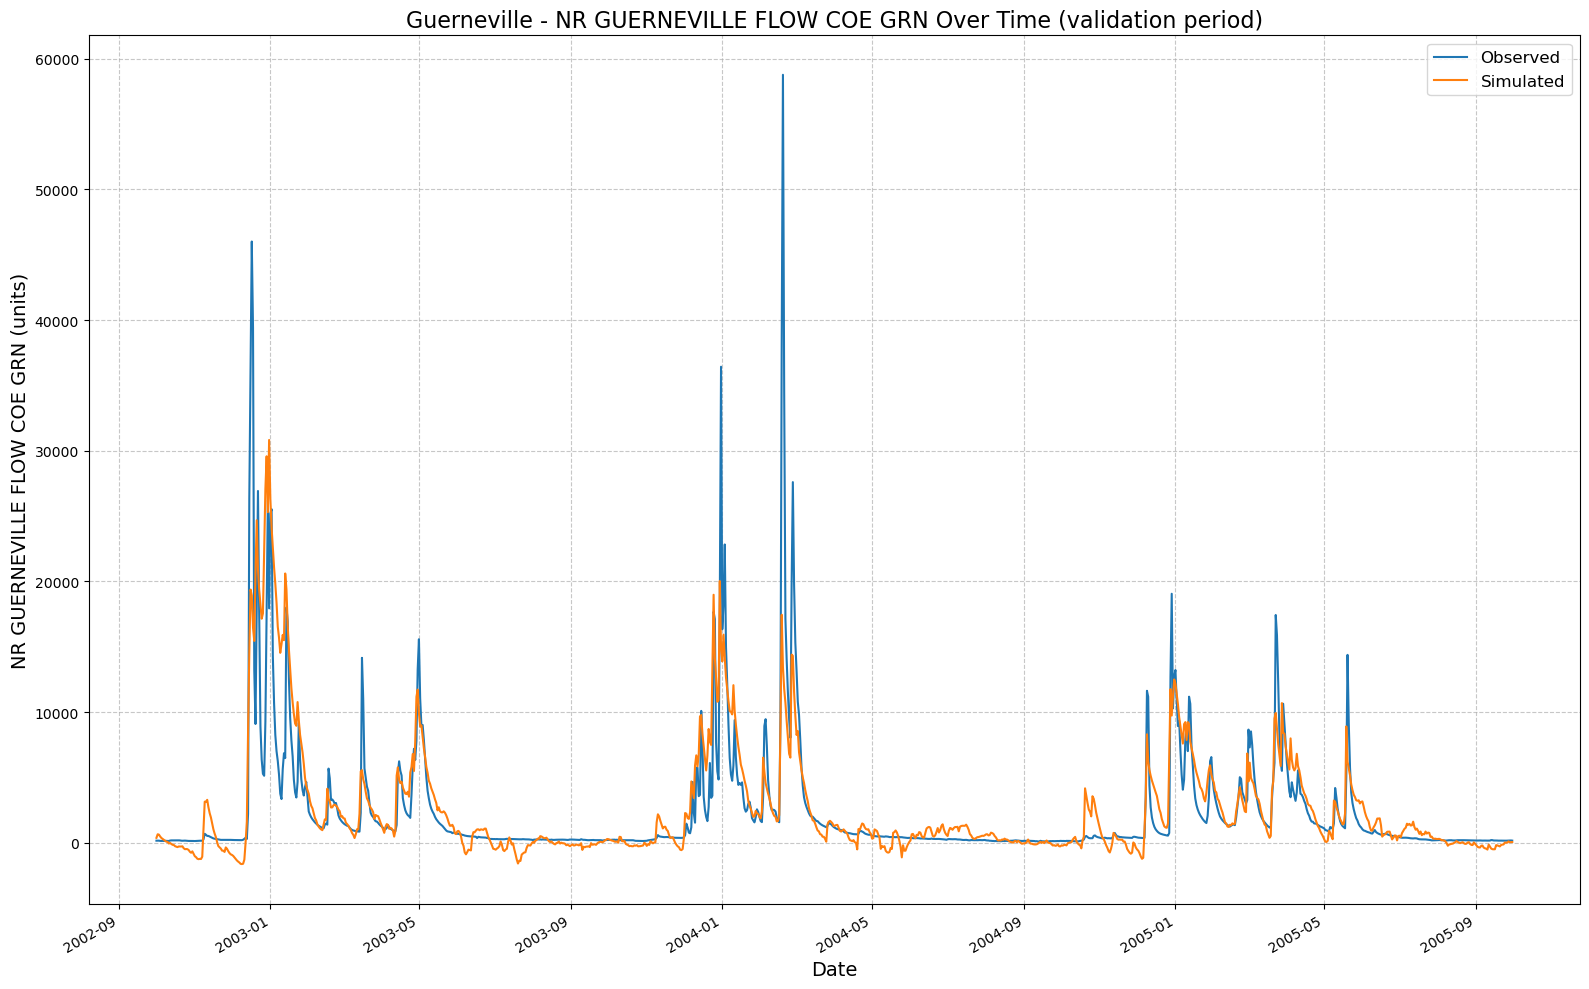

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_193044\results_output_validation.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



{'NSE': 0.6048045754432678,
 'MSE': 9783328.0,
 'RMSE': 3127.831197491322,
 'KGE': 0.7494741149716162,
 'Alpha-NSE': 0.8890267931639345,
 'Beta-KGE': 1.0657405853271484,
 'Beta-NSE': 0.03173019041127052,
 'Pearson-r': 0.7852295600539527,
 'FHV': -21.068909764289856,
 'FMS': 39.46675144477958,
 'FLV': -550.1509332478045,
 'Peak-Timing': 1.6,
 'Peak-MAPE': 55.573081970214844}

In [51]:
#outputs simple graph, also logs where the csv where the results are stored (use this csv for when you plot combined graph), also prints the metrics
lstmNoPhysicsDaily.results() 

## Physics-Informed LSTM (PLSTM) trained on training set, validated on validation set


In [41]:
path_to_physics_data = Path(library_path +"/russian_river_data/Guerneville_daily.csv")
params = {
    "epochs":8,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily.csv
    "BIG SULPHUR CR ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 10 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "GREEN VALLEY ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "LAGUNA ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 40 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 50 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "SANTA ROSA CR 10 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "SANTA ROSA CR 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "BIG SULPHUR CR PRECIP-INC SCREENED",
    "DRY CREEK 10 PRECIP-INC SCREENED",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "GREEN VALLEY PRECIP-INC SCREENED",
    "LAGUNA PRECIP-INC SCREENED",
    "RUSSIAN 20 PRECIP-INC SCREENED",
    "RUSSIAN 30 PRECIP-INC SCREENED",
    "RUSSIAN 40 PRECIP-INC SCREENED",
    "RUSSIAN 50 PRECIP-INC SCREENED",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "SANTA ROSA CR 10 PRECIP-INC SCREENED",
    "SANTA ROSA CR 20 PRECIP-INC SCREENED",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    "GEYSERVILLE CA FLOW USGS-MERGED",
    # from new Guernerville.csv
    "Guerneville Gage FLOW",	
    "Big Sulphur Cr ET-POTENTIAL",	
    "Big Sulphur Cr FLOW",	
    "Big Sulphur Cr FLOW-BASE",	
    "Big Sulphur Cr INFILTRATION",	
    "Big Sulphur Cr PERC-SOIL",	
    "Big Sulphur Cr SATURATION FRACTION",	
    "Dry Creek 10 ET-POTENTIAL",	
    "Dry Creek 10 FLOW",	
    "Dry Creek 10 FLOW-BASE",	
    "Dry Creek 10 INFILTRATION",	
    "Dry Creek 10 PERC-SOIL",	
    "Dry Creek 10 SATURATION FRACTION",	
    "Green Valley ET-POTENTIAL",	
    "Green Valley FLOW",	
    "Green Valley FLOW-BASE",	
    "Green Valley INFILTRATION",	
    "Green Valley PERC-SOIL",	
    "Green Valley SATURATION FRACTION",	
    "Laguna ET-POTENTIAL",	
    "Laguna FLOW",	
    "Laguna FLOW-BASE",	
    "Laguna INFILTRATION",	
    "Laguna PERC-SOIL",	
    "Laguna SATURATION FRACTION",	
    "Russian 20 ET-POTENTIAL",	
    "Russian 20 FLOW",	
    "Russian 20 FLOW-BASE",	
    "Russian 20 INFILTRATION",	
    "Russian 20 PERC-SOIL",	
    "Russian 20 SATURATION FRACTION",	
    "Russian 30 ET-POTENTIAL",	
    "Russian 30 FLOW",	
    "Russian 30 FLOW-BASE",	
    "Russian 30 INFILTRATION",	
    "Russian 30 PERC-SOIL",	
    "Russian 30 SATURATION FRACTION",	
    "Russian 40 ET-POTENTIAL",	
    "Russian 40 FLOW",	
    "Russian 40 FLOW-BASE",	
    "Russian 40 INFILTRATION",	
    "Russian 40 PERC-SOIL",	
    "Russian 40 SATURATION FRACTION",	
    "Russian 50 ET-POTENTIAL",	
    "Russian 50 FLOW",	
    "Russian 50 FLOW-BASE",	
    "Russian 50 INFILTRATION",	
    "Russian 50 PERC-SOIL",	
    "Russian 50 SATURATION FRACTION",	
    "Russian 60 ET-POTENTIAL",	
    "Russian 60 FLOW",	
    "Russian 60 FLOW-BASE",	
    "Russian 60 INFILTRATION",	
    "Russian 60 PERC-SOIL",	
    "Russian 60 SATURATION FRACTION",	
    "Russian 70 ET-POTENTIAL",	
    "Russian 70 FLOW",	
    "Russian 70 FLOW-BASE",	
    "Russian 70 INFILTRATION",	
    "Russian 70 PERC-SOIL",	
    "Russian 70 SATURATION FRACTION",	
    "Santa Rosa Cr 10 ET-POTENTIAL",	
    "Santa Rosa Cr 10 FLOW",	
    "Santa Rosa Cr 10 FLOW-BASE",	
    "Santa Rosa Cr 10 INFILTRATION",	
    "Santa Rosa Cr 10 PERC-SOIL",	
    "Santa Rosa Cr 10 SATURATION FRACTION",	
    "Santa Rosa Cr 20 ET-POTENTIAL",	
    "Santa Rosa Cr 20 FLOW",	
    "Santa Rosa Cr 20 FLOW-BASE",	
    "Santa Rosa Cr 20 INFILTRATION",	
    "Santa Rosa Cr 20 PERC-SOIL",	
    "Santa Rosa Cr 20 SATURATION FRACTION",	
    "WF Russian ET-POTENTIAL",	
    "WF Russian FLOW",	
    "WF Russian FLOW-BASE",	
    "WF Russian INFILTRATION",	
    "WF Russian PERC-SOIL",	
    "WF Russian SATURATION FRACTION",
    #"Lake Sonoma Storage",
    #"Lake Mendocino Storage",    
    ]
lstmPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False)

In [43]:
lstmPhysicsDaily.train()

2025-02-06 19:29:11,326: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_192911\output.log initialized.
2025-02-06 19:29:11,328: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_192911
2025-02-06 19:29:11,330: ### Run configurations for testing_run
2025-02-06 19:29:11,332: experiment_name: testing_run
2025-02-06 19:29:11,333: train_basin_file: guerneville
2025-02-06 19:29:11,334: validation_basin_file: guerneville
2025-02-06 19:29:11,336: test_basin_file: guerneville
2025-02-06 19:29:11,338: train_start_date: 1994-10-01 00:00:00
2025-02-06 19:29:11,341: train_end_date: 2002-09-30 00:00:00
2025-02-06 19:29:11,343: validation_start_date: 2002-10-01 00:00:00
2025-02-06 19:29:11,345: validation_end_date: 2005-09-30 00:00:00
2025-02-06 19:29:11,348: test_start_date: 2005-10-01 00:00:00
2025-02-06 19:29:11,350: test_end_date: 2009-09-29 00:00:00
2025-02-06 19:29:11,352: device: cpu
2

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]
2025-02-06 19:29:26,298: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_192911\validation\model_epoch008\validation_metrics.csv
2025-02-06 19:29:26,302: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_192911\validation\model_epoch008\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_0602_192911')

got predictions


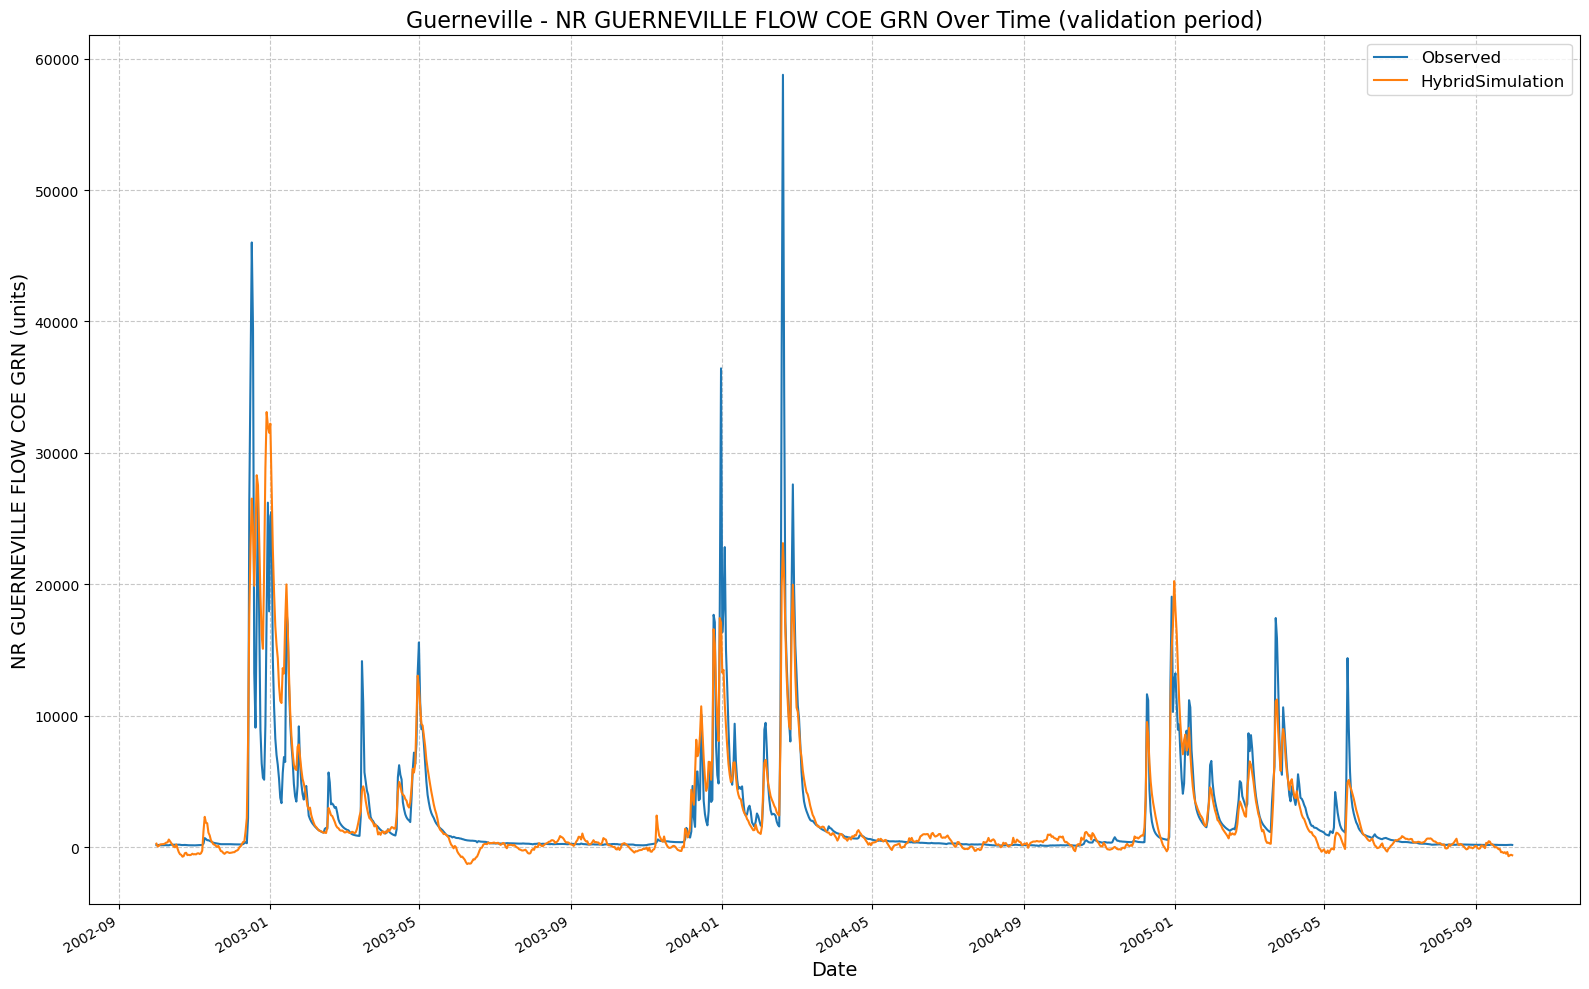

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_192911\results_output_validation.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



{'NSE': 0.7315782010555267,
 'MSE': 6644961.5,
 'RMSE': 2577.782283281503,
 'KGE': 0.8458667593670066,
 'Alpha-NSE': 0.9395212171184665,
 'Beta-KGE': 0.9840491414070129,
 'Beta-NSE': -0.007698797566752288,
 'Pearson-r': 0.8591279204407662,
 'FHV': -11.291774362325668,
 'FMS': 7.277916182400511,
 'FLV': -1109.17727179921,
 'Peak-Timing': 0.8,
 'Peak-MAPE': 42.18331336975098}

In [45]:
lstmPhysicsDaily.results()

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UC

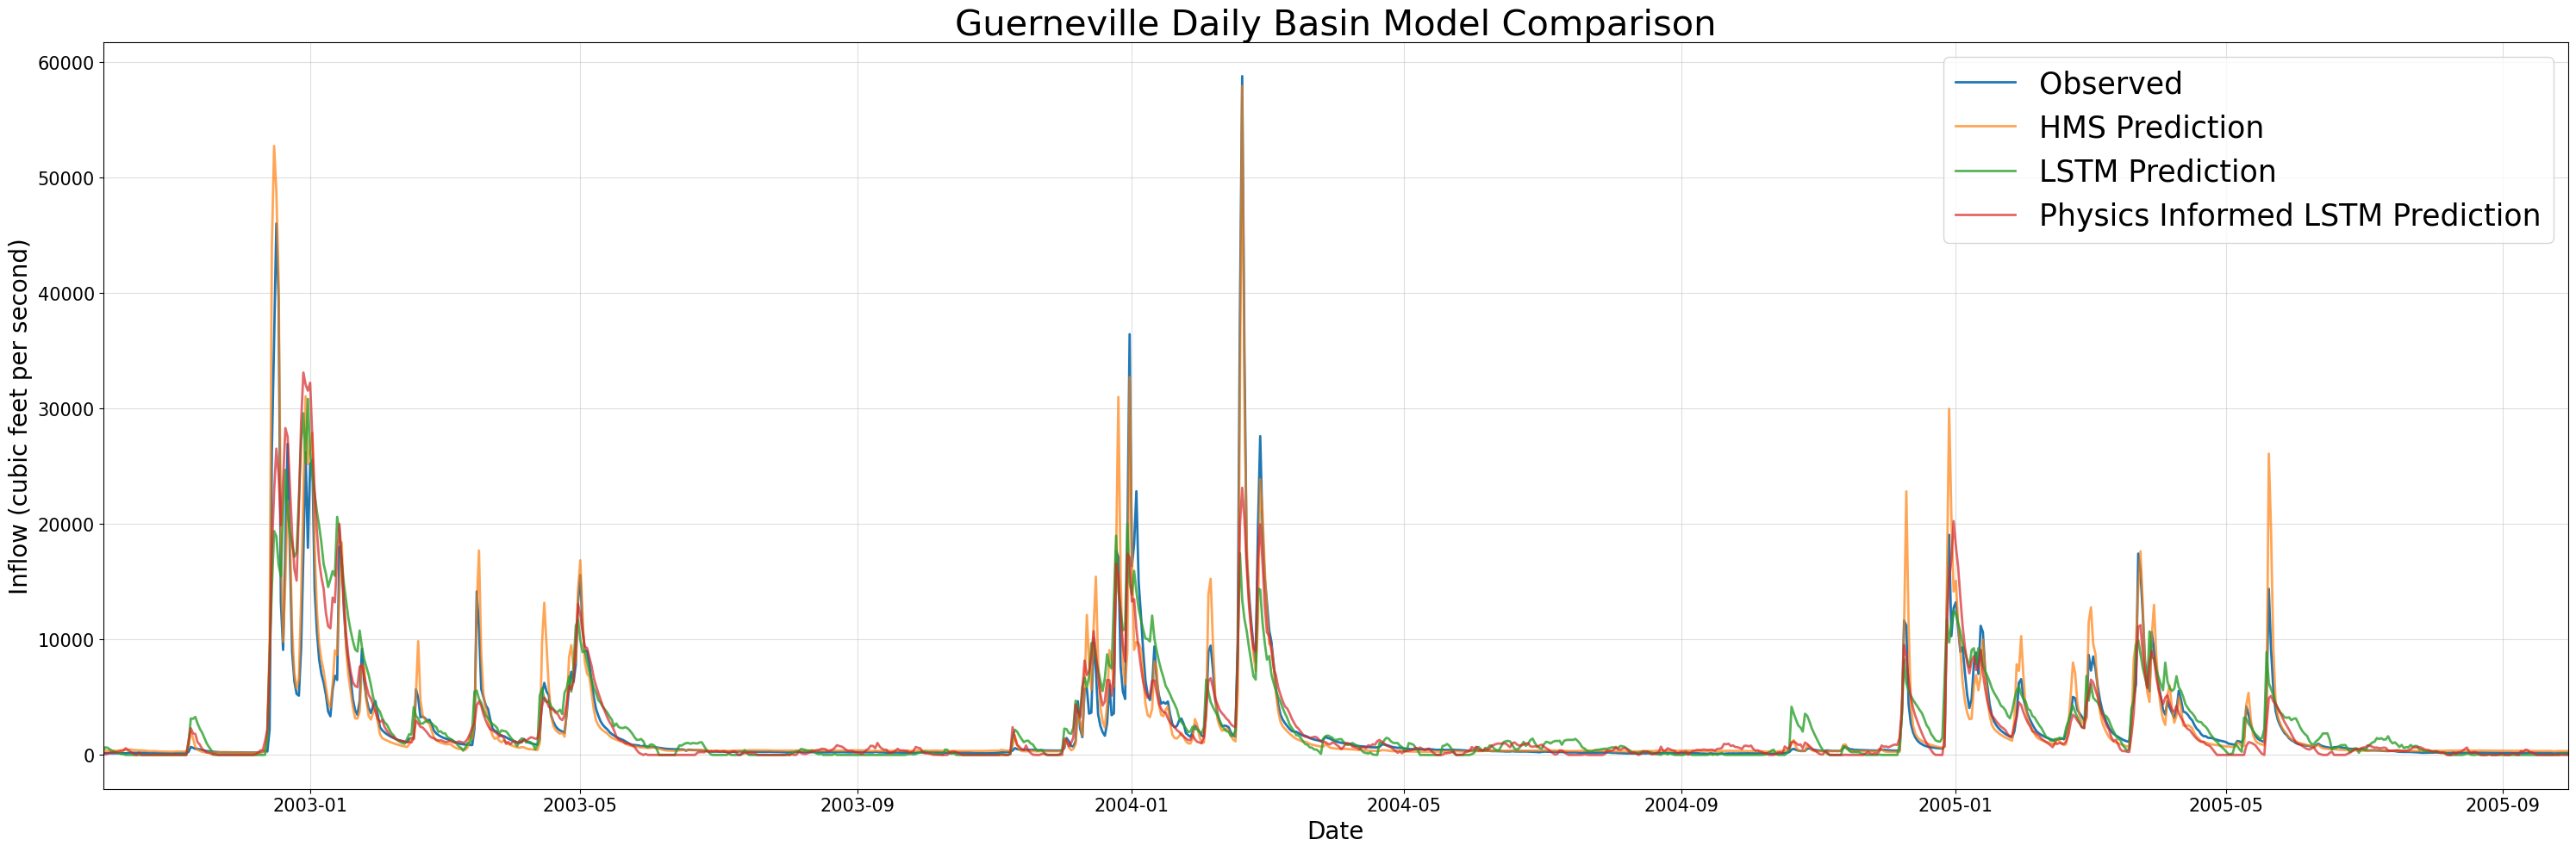

In [53]:
lstm_results_path = 'F:/Dino/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_0602_193044/results_output_validation.csv'
lstmPhysics_results_path = 'F:/Dino/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_0602_192911/results_output_validation.csv'
myplot, metrics_df = combinedPlot(lstm_results=lstm_results_path, lstmPhysics_results= lstmPhysics_results_path, HMS_results=path_to_physics_data, title='Guerneville Daily Basin Model Comparison', fName = "guerneville_daily_eval_metrics.csv")

In [55]:
metrics_df

,HMS,LSTM,Physics_Informed_LSTM
NSE,8.819593e-01,6.095725e-01,7.342686e-01
MSE,2.922176e+06,9.665296e+06,6.578358e+06
RMSE,1.709437e+03,3.108906e+03,2.564831e+03
KGE,8.769167e-01,7.328387e-01,8.448570e-01
Alpha-NSE,1.099693e+00,8.763815e-01,9.333817e-01
Beta-KGE,1.053143e+00,1.104415e+00,1.006388e+00
Beta-NSE,2.564997e-02,5.039647e-02,3.083052e-03
Pearson-r,9.511482e-01,7.874178e-01,8.600338e-01
FHV,1.141927e+01,-2.106891e+01,-1.129177e+01
FMS,-1.806008e+01,3.946675e+01,7.277938e+00


## If you prefer the interactive plotly graph , you can use 'fancyCombinedPlot' (must have plotly library downloaded)

In [58]:
#lstm_results_path = '/Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0402_164712/results_output_validation.csv'
#lstmPhysics_results_path = '/Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0402_173955/results_output_validation.csv'
path_to_physics_data = Path(library_path +"/russian_river_data/Guerneville_daily.csv")

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UC

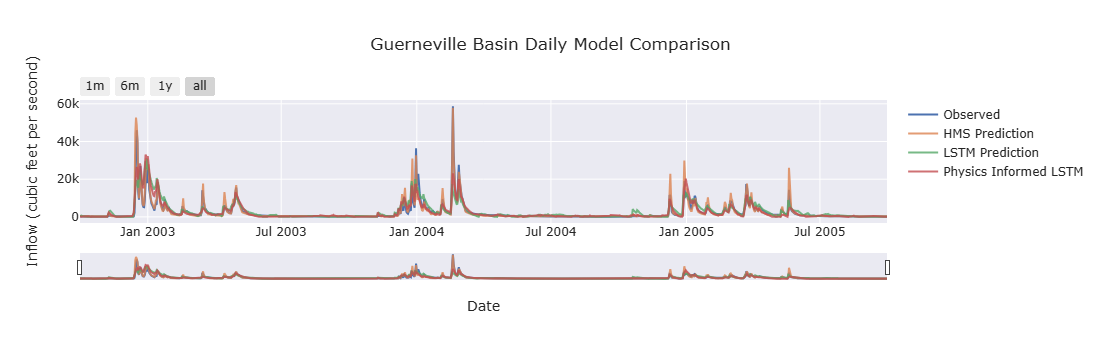

,HMS,LSTM,Physics_Informed_LSTM
NSE,8.819593e-01,6.095725e-01,7.342686e-01
MSE,2.922176e+06,9.665296e+06,6.578358e+06
RMSE,1.709437e+03,3.108906e+03,2.564831e+03
KGE,8.769167e-01,7.328387e-01,8.448570e-01
Alpha-NSE,1.099693e+00,8.763815e-01,9.333817e-01
Beta-KGE,1.053143e+00,1.104415e+00,1.006388e+00
Beta-NSE,2.564997e-02,5.039647e-02,3.083052e-03
Pearson-r,9.511482e-01,7.874178e-01,8.600338e-01
FHV,1.141927e+01,-2.106891e+01,-1.129177e+01
FMS,-1.806008e+01,3.946675e+01,7.277938e+00


In [60]:
fancyCombinedPlot(lstm_results=lstm_results_path, lstmPhysics_results= lstmPhysics_results_path, HMS_results=path_to_physics_data, title='Guerneville Basin Daily Model Comparison', fName = "guerneville_daily_eval_metrics.csv")

## Re-train standard daily LSTM (no ensembles, no physics) on entire dataset, evaluate on test period

In [62]:
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
lstmNoPhysicsDailyExt = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=False, extend_train_period=True)

In [64]:
lstmNoPhysicsDailyExt.train()

2025-02-06 19:32:59,859: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_193259\output.log initialized.
2025-02-06 19:32:59,862: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_193259
2025-02-06 19:32:59,865: ### Run configurations for testing_run
2025-02-06 19:32:59,867: experiment_name: testing_run
2025-02-06 19:32:59,870: train_basin_file: guerneville
2025-02-06 19:32:59,873: validation_basin_file: guerneville
2025-02-06 19:32:59,875: test_basin_file: guerneville
2025-02-06 19:32:59,877: train_start_date: 1994-10-01 00:00:00
2025-02-06 19:32:59,878: train_end_date: 2005-09-30 00:00:00
2025-02-06 19:32:59,879: validation_start_date: 2002-10-01 00:00:00
2025-02-06 19:32:59,881: validation_end_date: 2005-09-30 00:00:00
2025-02-06 19:32:59,883: test_start_date: 2005-10-01 00:00:00
2025-02-06 19:32:59,884: test_end_date: 2009-09-29 00:00:00
2025-02-06 19:32:59,886: device: cpu
2

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]
2025-02-06 19:33:27,945: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_193259\validation\model_epoch016\validation_metrics.csv
2025-02-06 19:33:27,949: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_193259\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_0602_193259')

got predictions


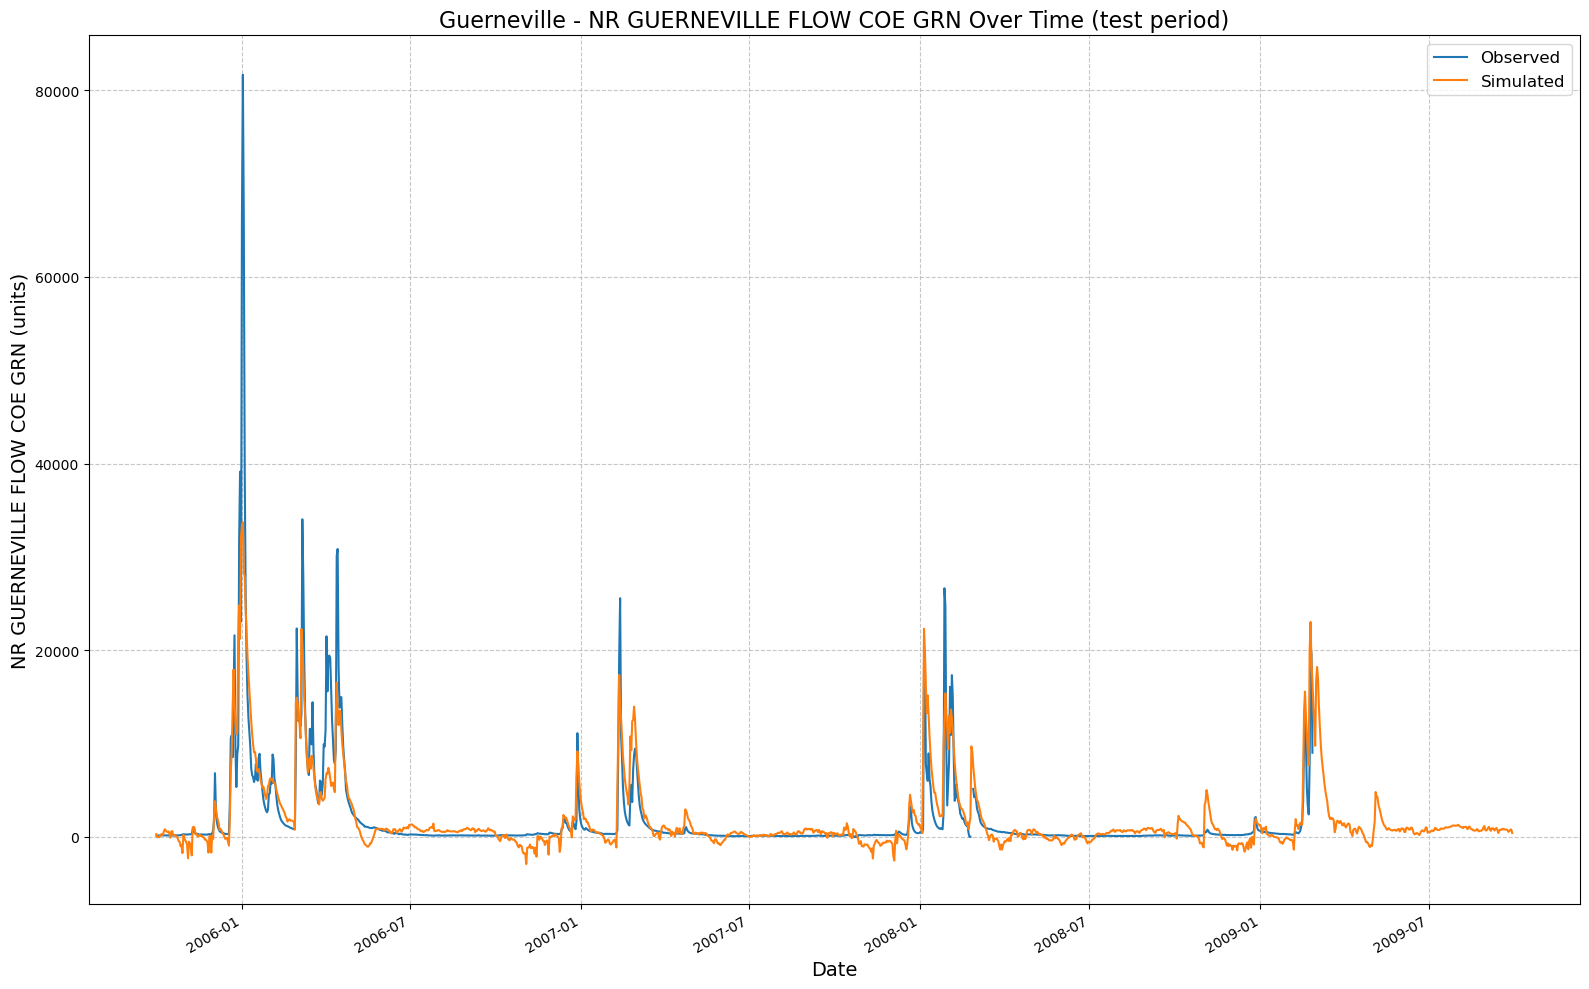

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_193259\results_output_test.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



{'NSE': 0.7256529033184052,
 'MSE': 8444874.0,
 'RMSE': 2906.006538189479,
 'KGE': 0.7322919559673482,
 'Alpha-NSE': 0.77531016115117,
 'Beta-KGE': 0.9813564419746399,
 'Beta-NSE': -0.006525685538673896,
 'Pearson-r': 0.8556584228227013,
 'FHV': -28.379520773887634,
 'FMS': 44.08373711891678,
 'FLV': 84.58803149275128,
 'Peak-Timing': 0.75,
 'Peak-MAPE': 44.69945430755615}

In [81]:
lstmNoPhysicsDailyExt.results('test')

## Re-train physics daily LSTM (no ensembles, no physics) on entire dataset, evaluate on test period

In [71]:
path_to_physics_data = Path(library_path +"/russian_river_data/Guerneville_daily.csv")
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily.csv
    "BIG SULPHUR CR ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 10 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "GREEN VALLEY ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "LAGUNA ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 40 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 50 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "SANTA ROSA CR 10 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "SANTA ROSA CR 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "BIG SULPHUR CR PRECIP-INC SCREENED",
    "DRY CREEK 10 PRECIP-INC SCREENED",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "GREEN VALLEY PRECIP-INC SCREENED",
    "LAGUNA PRECIP-INC SCREENED",
    "RUSSIAN 20 PRECIP-INC SCREENED",
    "RUSSIAN 30 PRECIP-INC SCREENED",
    "RUSSIAN 40 PRECIP-INC SCREENED",
    "RUSSIAN 50 PRECIP-INC SCREENED",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "SANTA ROSA CR 10 PRECIP-INC SCREENED",
    "SANTA ROSA CR 20 PRECIP-INC SCREENED",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    "GEYSERVILLE CA FLOW USGS-MERGED",
    # from new Guernerville.csv
    "Guerneville Gage FLOW",	
    "Big Sulphur Cr ET-POTENTIAL",	
    "Big Sulphur Cr FLOW",	
    "Big Sulphur Cr FLOW-BASE",	
    "Big Sulphur Cr INFILTRATION",	
    "Big Sulphur Cr PERC-SOIL",	
    "Big Sulphur Cr SATURATION FRACTION",	
    "Dry Creek 10 ET-POTENTIAL",	
    "Dry Creek 10 FLOW",	
    "Dry Creek 10 FLOW-BASE",	
    "Dry Creek 10 INFILTRATION",	
    "Dry Creek 10 PERC-SOIL",	
    "Dry Creek 10 SATURATION FRACTION",	
    "Green Valley ET-POTENTIAL",	
    "Green Valley FLOW",	
    "Green Valley FLOW-BASE",	
    "Green Valley INFILTRATION",	
    "Green Valley PERC-SOIL",	
    "Green Valley SATURATION FRACTION",	
    "Laguna ET-POTENTIAL",	
    "Laguna FLOW",	
    "Laguna FLOW-BASE",	
    "Laguna INFILTRATION",	
    "Laguna PERC-SOIL",	
    "Laguna SATURATION FRACTION",	
    "Russian 20 ET-POTENTIAL",	
    "Russian 20 FLOW",	
    "Russian 20 FLOW-BASE",	
    "Russian 20 INFILTRATION",	
    "Russian 20 PERC-SOIL",	
    "Russian 20 SATURATION FRACTION",	
    "Russian 30 ET-POTENTIAL",	
    "Russian 30 FLOW",	
    "Russian 30 FLOW-BASE",	
    "Russian 30 INFILTRATION",	
    "Russian 30 PERC-SOIL",	
    "Russian 30 SATURATION FRACTION",	
    "Russian 40 ET-POTENTIAL",	
    "Russian 40 FLOW",	
    "Russian 40 FLOW-BASE",	
    "Russian 40 INFILTRATION",	
    "Russian 40 PERC-SOIL",	
    "Russian 40 SATURATION FRACTION",	
    "Russian 50 ET-POTENTIAL",	
    "Russian 50 FLOW",	
    "Russian 50 FLOW-BASE",	
    "Russian 50 INFILTRATION",	
    "Russian 50 PERC-SOIL",	
    "Russian 50 SATURATION FRACTION",	
    "Russian 60 ET-POTENTIAL",	
    "Russian 60 FLOW",	
    "Russian 60 FLOW-BASE",	
    "Russian 60 INFILTRATION",	
    "Russian 60 PERC-SOIL",	
    "Russian 60 SATURATION FRACTION",	
    "Russian 70 ET-POTENTIAL",	
    "Russian 70 FLOW",	
    "Russian 70 FLOW-BASE",	
    "Russian 70 INFILTRATION",	
    "Russian 70 PERC-SOIL",	
    "Russian 70 SATURATION FRACTION",	
    "Santa Rosa Cr 10 ET-POTENTIAL",	
    "Santa Rosa Cr 10 FLOW",	
    "Santa Rosa Cr 10 FLOW-BASE",	
    "Santa Rosa Cr 10 INFILTRATION",	
    "Santa Rosa Cr 10 PERC-SOIL",	
    "Santa Rosa Cr 10 SATURATION FRACTION",	
    "Santa Rosa Cr 20 ET-POTENTIAL",	
    "Santa Rosa Cr 20 FLOW",	
    "Santa Rosa Cr 20 FLOW-BASE",	
    "Santa Rosa Cr 20 INFILTRATION",	
    "Santa Rosa Cr 20 PERC-SOIL",	
    "Santa Rosa Cr 20 SATURATION FRACTION",	
    "WF Russian ET-POTENTIAL",	
    "WF Russian FLOW",	
    "WF Russian FLOW-BASE",	
    "WF Russian INFILTRATION",	
    "WF Russian PERC-SOIL",	
    "WF Russian SATURATION FRACTION",
    #"Lake Sonoma Storage",
    #"Lake Mendocino Storage",    
    ]
lstmPhysicsDailyExt = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False, extend_train_period=True)

In [73]:
lstmPhysicsDailyExt.train()

2025-02-06 19:34:10,358: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_193410\output.log initialized.
2025-02-06 19:34:10,361: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_193410
2025-02-06 19:34:10,363: ### Run configurations for testing_run
2025-02-06 19:34:10,366: experiment_name: testing_run
2025-02-06 19:34:10,369: train_basin_file: guerneville
2025-02-06 19:34:10,372: validation_basin_file: guerneville
2025-02-06 19:34:10,375: test_basin_file: guerneville
2025-02-06 19:34:10,377: train_start_date: 1994-10-01 00:00:00
2025-02-06 19:34:10,378: train_end_date: 2005-09-30 00:00:00
2025-02-06 19:34:10,380: validation_start_date: 2002-10-01 00:00:00
2025-02-06 19:34:10,382: validation_end_date: 2005-09-30 00:00:00
2025-02-06 19:34:10,384: test_start_date: 2005-10-01 00:00:00
2025-02-06 19:34:10,388: test_end_date: 2009-09-29 00:00:00
2025-02-06 19:34:10,391: device: cpu
2

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]
2025-02-06 19:34:47,028: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_193410\validation\model_epoch016\validation_metrics.csv
2025-02-06 19:34:47,031: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_193410\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_0602_193410')

2025-02-06 19:35:42,997: Using the model weights from F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_193410\model_epoch016.pt


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Evaluation: 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]
2025-02-06 19:35:44,410: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_193410\test\model_epoch016\test_metrics.csv
2025-02-06 19:35:44,413: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_193410\test\model_epoch016\test_results.p
got predictions


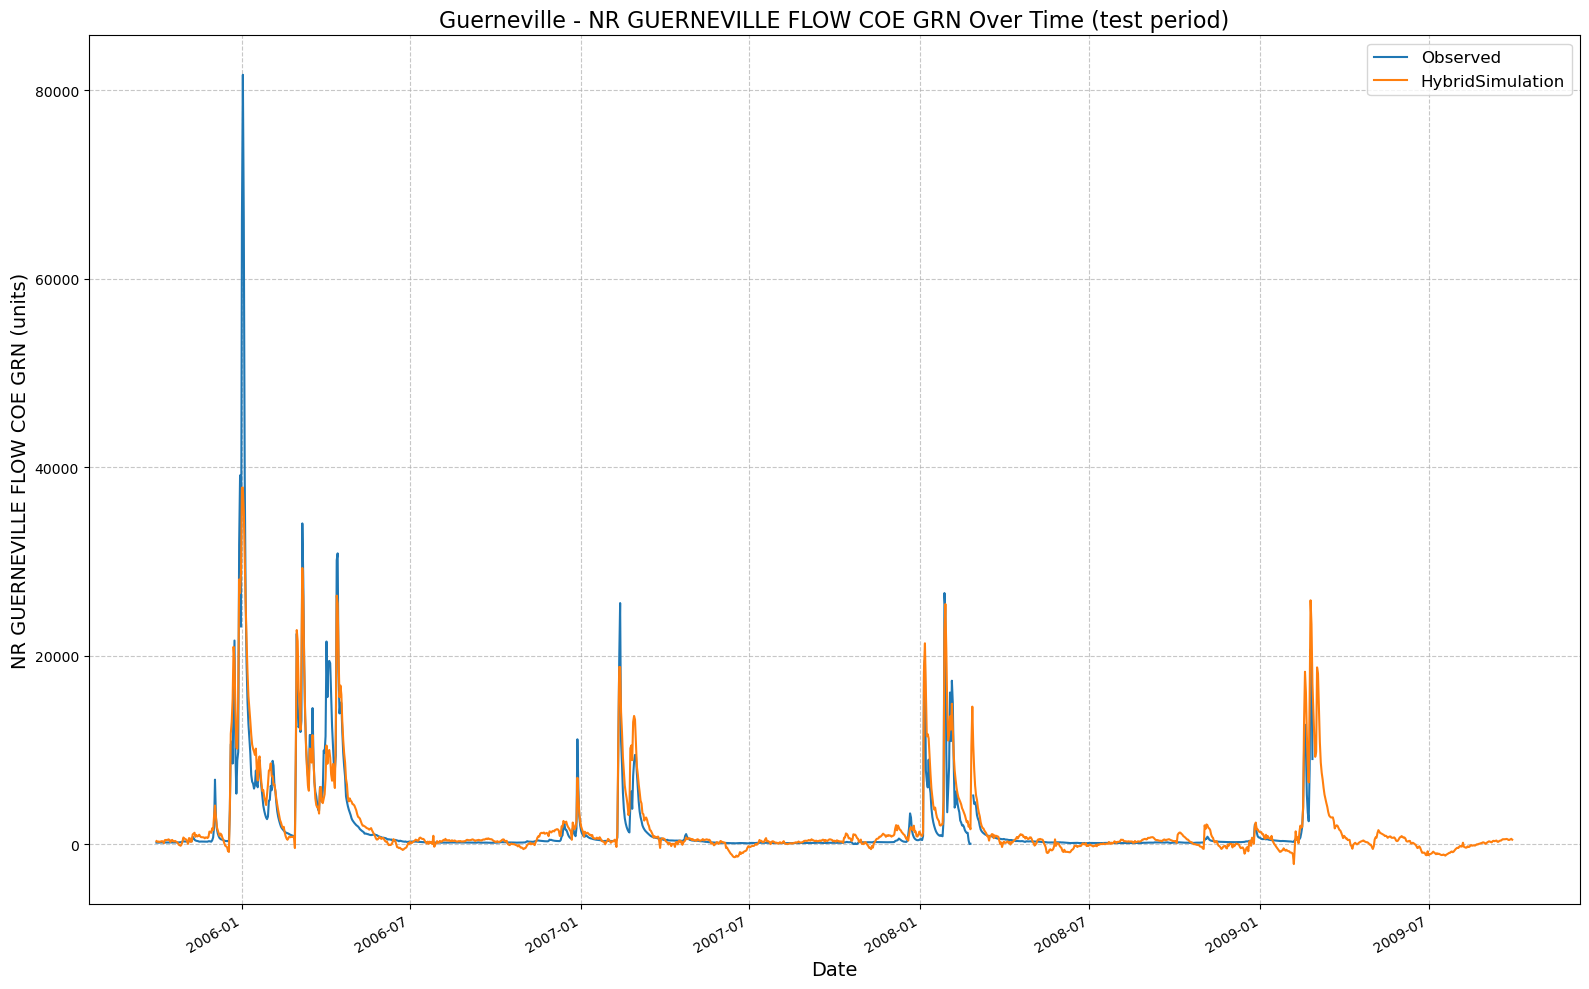

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_0602_193410\results_output_test.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



{'NSE': 0.8229264914989471,
 'MSE': 5450627.0,
 'RMSE': 2334.6577907693454,
 'KGE': 0.8117047582604677,
 'Alpha-NSE': 0.860745390057752,
 'Beta-KGE': 1.0881730318069458,
 'Beta-NSE': 0.03086260659018684,
 'Pearson-r': 0.9089573279524785,
 'FHV': -17.193950712680817,
 'FMS': 9.369773314485979,
 'FLV': 63.4646953159679,
 'Peak-Timing': 0.75,
 'Peak-MAPE': 27.663142681121826}

In [75]:
lstmPhysicsDailyExt.results('test')

## compare results

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UC

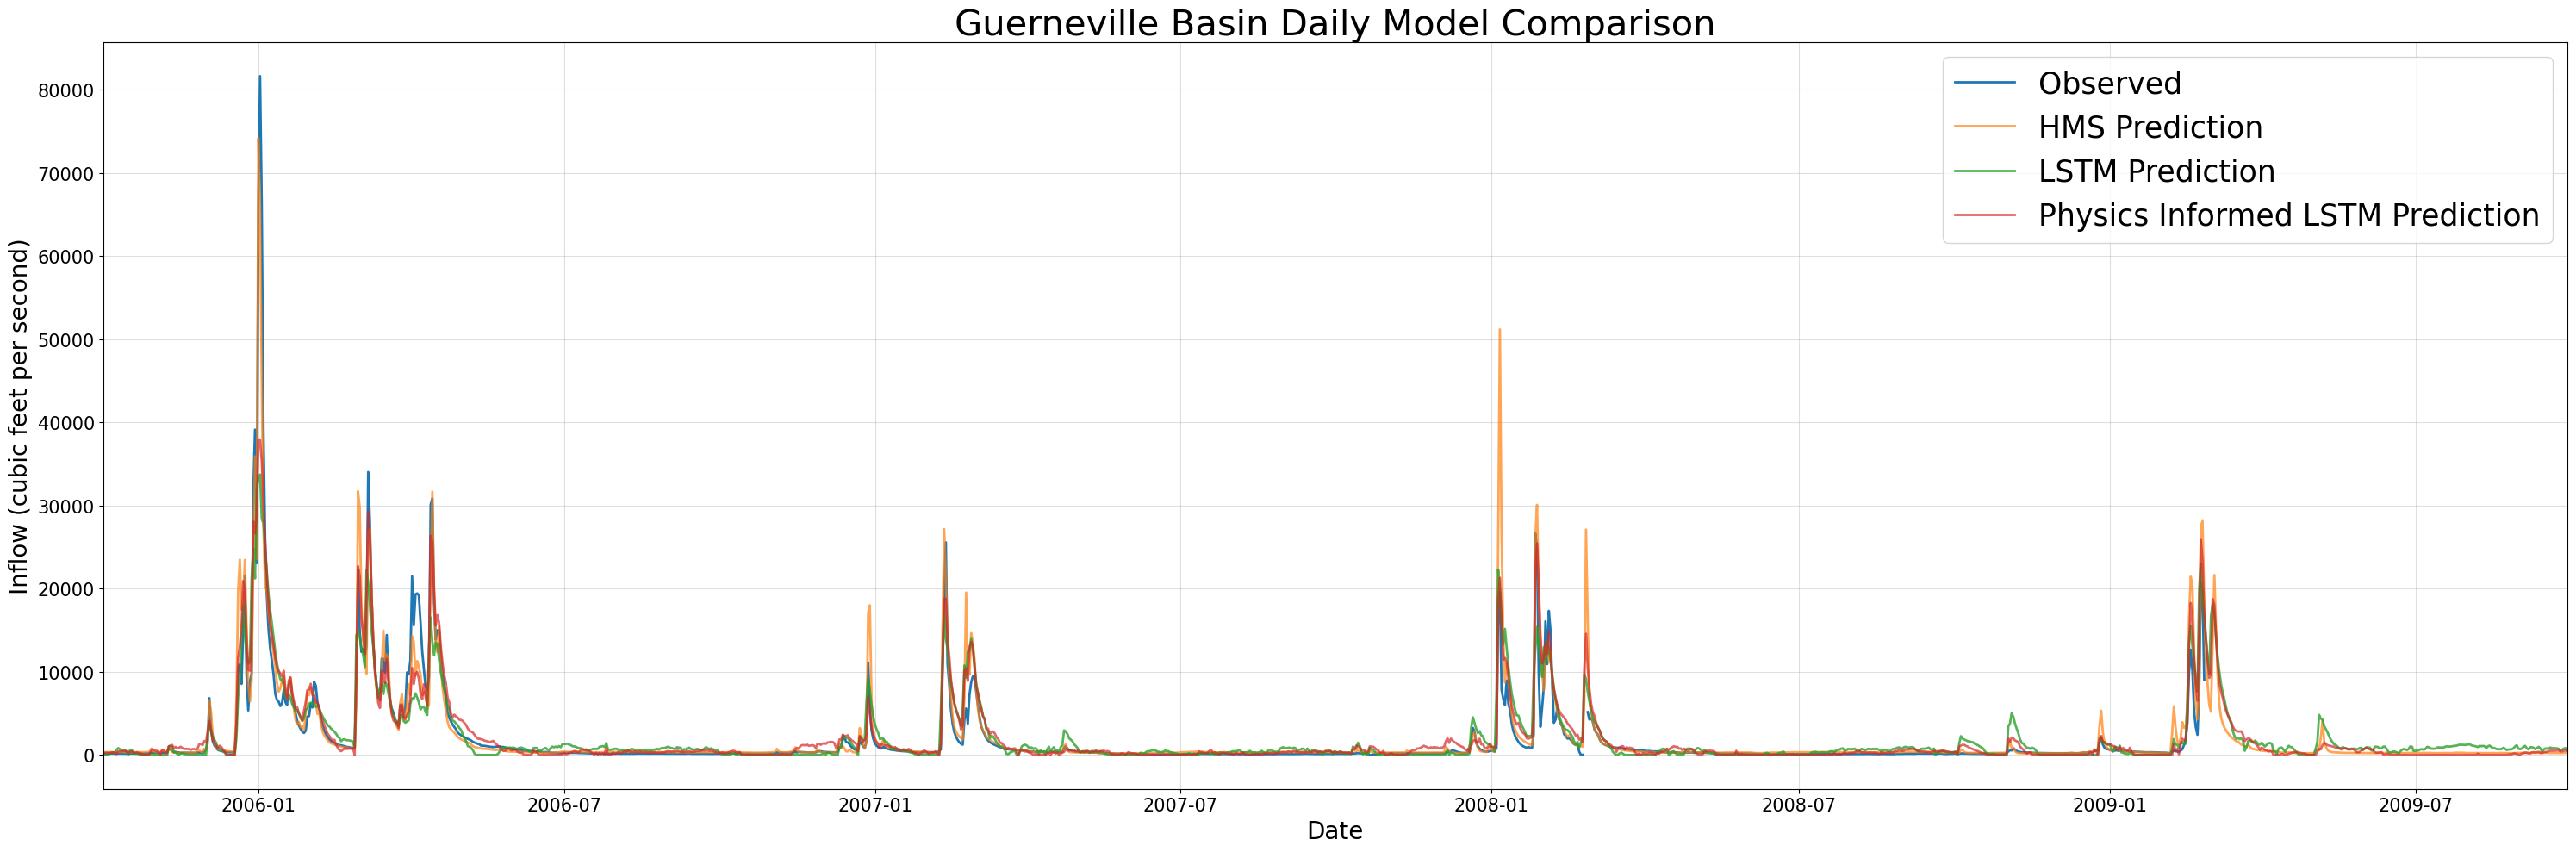

In [85]:
lstm_results_path_ext = 'F:/Dino/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_0602_193259/results_output_test.csv'
lstmPhysics_results_path_ext = 'F:/Dino/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_0602_193410/results_output_test.csv'
myplot, metrics_df = combinedPlot(lstm_results=lstm_results_path_ext, lstmPhysics_results= lstmPhysics_results_path_ext, HMS_results=path_to_physics_data, title='Guerneville Basin Daily Model Comparison', fName = "guerneville_daily_metrics.csv")

In [87]:
metrics_df

,HMS,LSTM,Physics_Informed_LSTM
NSE,8.499265e-01,7.333873e-01,8.255459e-01
MSE,4.619520e+06,8.206796e+06,5.369998e+06
RMSE,2.149307e+03,2.864751e+03,2.317326e+03
KGE,8.429764e-01,7.165146e-01,7.874790e-01
Alpha-NSE,1.026759e+00,7.592669e-01,8.537302e-01
Beta-KGE,1.137158e+00,1.060086e+00,1.126248e+00
Beta-NSE,4.800851e-02,2.103138e-02,4.418963e-02
Pearson-r,9.283899e-01,8.628823e-01,9.115022e-01
FHV,2.575217e+00,-2.837952e+01,-1.719395e+01
FMS,-2.428297e+01,4.408375e+01,9.369776e+00


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UC

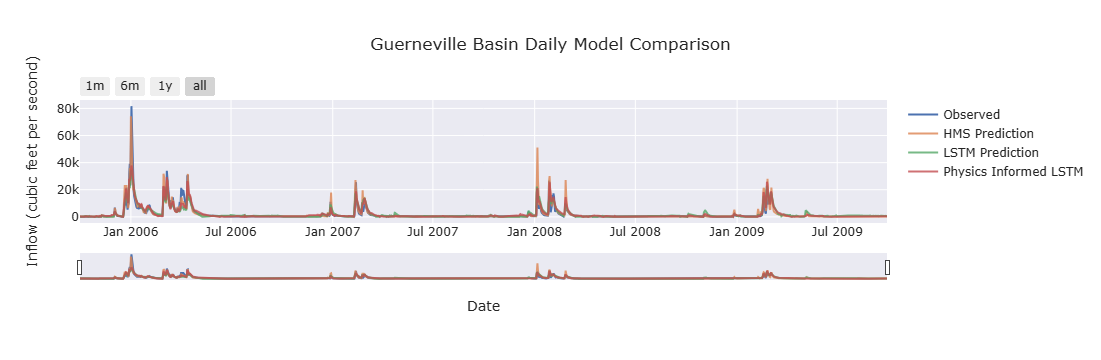

,HMS,LSTM,Physics_Informed_LSTM
NSE,8.499265e-01,7.333873e-01,8.255459e-01
MSE,4.619520e+06,8.206796e+06,5.369998e+06
RMSE,2.149307e+03,2.864751e+03,2.317326e+03
KGE,8.429764e-01,7.165146e-01,7.874790e-01
Alpha-NSE,1.026759e+00,7.592669e-01,8.537302e-01
Beta-KGE,1.137158e+00,1.060086e+00,1.126248e+00
Beta-NSE,4.800851e-02,2.103138e-02,4.418963e-02
Pearson-r,9.283899e-01,8.628823e-01,9.115022e-01
FHV,2.575217e+00,-2.837952e+01,-1.719395e+01
FMS,-2.428297e+01,4.408375e+01,9.369776e+00


In [89]:
fancyCombinedPlot(lstm_results=lstm_results_path_ext, lstmPhysics_results= lstmPhysics_results_path_ext, HMS_results=path_to_physics_data, title='Guerneville Basin Daily Model Comparison', fName = "guerneville_daily_metrics.csv")